In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.cluster import KMeans
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import shutil

In [2]:
def image_feature(direc):
    model = InceptionV3(weights='imagenet', include_top=False)
    features = [];
    img_name = [];
    for i in tqdm(direc):
        fname='cluster'+'/'+i
        img=image.load_img(fname,target_size=(224,224))
        x = img_to_array(img)
        x=np.expand_dims(x,axis=0)
        x=preprocess_input(x)
        feat=model.predict(x)
        feat=feat.flatten()
        features.append(feat)
        img_name.append(i)
    return features,img_name

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Path to your dataset directory
dataset_dir = "/content/drive/MyDrive/dataset"

# Load images from the dataset directory
image_files = []
for file_name in os.listdir(dataset_dir):
    # Construct the full path to the file
    file_path = os.path.join(dataset_dir, file_name)

    try:
        # Attempt to load the image file
        image = mpl.image.imread(file_path)

        # Check if the image was loaded successfully
        if image is not None:
            image_files.append(image)
        else:
            print(f"Failed to load image: {file_path}")
    except Exception as e:
        print(f"Error loading image: {file_path}. Exception: {e}")

# Check if images are loaded
if not image_files:
    print("No images found in the dataset directory.")
    exit()

# Convert image data to numpy array
image_data = np.array(image_files)

# Reshape image data to 2D array
data = image_data.reshape(-1, 3)

# Check if data is empty
if data.size == 0:
    print("No data found in the dataset.")
    exit()

# Convert data to float32
data = np.float32(data)

# Define criteria and run k-means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 10  # Number of clusters
attempts = 10
compactness, labels, centers = cv2.kmeans(data, K, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)

# Reshape the labels to the original image shape
labels = labels.reshape(image_data.shape[0], image_data.shape[1])

# Display the clustered images
for i in range(K):
    cluster = np.zeros_like(image_data)
    cluster[labels == i] = image_data[labels == i]
    plt.subplot(2, 5, i+1)
    plt.imshow(cluster)
    plt.title(f'Cluster {i+1}')
    plt.axis('off')

plt.show()


ValueError: cannot reshape array of size 4250880 into shape (164,243)

In [ ]:
import os
import cv2

# Path to your dataset directory on Google Drive
dataset_dir = "/content/drive/MyDrive/dataset"

# List to store image data
image_files = []

# Iterate through each file in the dataset directory
for file_name in os.listdir(dataset_dir):
    # Construct the full path to the file
    file_path = os.path.join(dataset_dir, file_name)

    try:
        # Attempt to load the image file
        image = mpl.image.imread(file_path)

        # Check if the image was loaded successfully
        if image is not None:
            image_files.append(image)
        else:
            print(f"Failed to load image: {file_path}")
    except Exception as e:
        print(f"Error loading image: {file_path}. Exception: {e}")



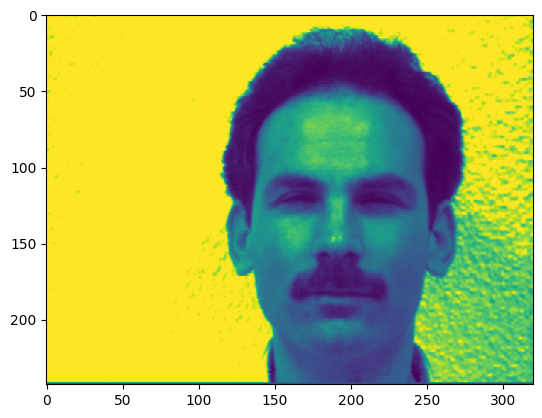

In [5]:
image  = mpl.image.imread("/content/drive/MyDrive/dataset/subject02_7.jpg")
plt.imshow(image)

In [6]:
def average_centers_distance(cluster_centers):

    # Function to calculate distance between two points
    def calculate_distance(point1, point2):
        return math.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2)

    distances = []
    for i in range(len(cluster_centers)):
        for j in range(i + 1, len(cluster_centers)):
            distance = calculate_distance(cluster_centers[i], cluster_centers[j])
            distances.append(distance)

    # Calculate the average distance
    return np.array(distances).var()

In [19]:
def variance():
    # Calculate variance for each feature within each cluster
    variance_df = df.groupby('Cluster').var()

    # Calculate average values of variances across all clusters
    average_ds = df.groupby('Cluster').mean()

    # Calculate average variances for each feature
    average_var_x = variance_df['X'].mean()
    average_var_y = variance_df['Y'].mean()
    average_var_h = variance_df['H'].mean()
    average_var_s = variance_df['S'].mean()
    average_var_v = variance_df['V'].mean()

    # Return average variances for each feature
    return average_var_x, average_var_y, average_var_h, average_var_s, average_var_v


In [20]:
def criteria():
    # Calculate criteria
    # first criterion
    criterion1 = (average_var_x + average_var_y) / 2

    # second criterion
    criterion2 = (average_var_h + average_var_s + average_var_v) / 3

    # third criterion
    criterion3 = np.var(np.array(list(Counter(kmeans.labels_).values())) / (width * height))

    # Extract X and Y coordinates
    cluster_centers = kmeans.cluster_centers_[:, -2:]

    # fourth criterion
    criterion4 = average_centers_distance(cluster_centers)

    variance_avg_h = average_ds['H'].var()
    variance_avg_s = average_ds['S'].var()
    variance_avg_v = average_ds['V'].var()

    # fifth criterion
    criterion5 = (variance_avg_h + variance_avg_s + variance_avg_v) / 3

    # Return all criteria values
    return criterion1, criterion2, criterion3, criterion4, criterion5


In [9]:
# Check if the loaded image is grayscale
if len(image.shape) == 2:
    # Convert grayscale image to 3-channel image
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Convert the image to HSV color spac
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
height, width = image_hsv.shape[:2]

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
h_channel = image_hsv[:, :, 0].flatten() / 360.0
s_channel = image_hsv[:, :, 1].flatten() / 255.0
v_channel = image_hsv[:, :, 2].flatten() / 255.0

x_features = np.repeat(np.arange(width), height) / (width - 1)
y_features = np.tile(np.arange(height), width) / (height - 1)

distance_features = np.array([[np.linalg.norm([x - width / 2, y - height / 2]) for x in range(width)] for y in range(height)]).flatten()
distance_features = distance_features / np.linalg.norm([width / 2, height / 2])


In [ ]:
import itertools
import joblib

import math
import pandas as pd
from collections import Counter
data = []
k = 20  # Number of clusters

# Generate combinations of values for h, s, v, and p
combinations = list(itertools.product(range(1, 6), repeat=4))

for h, s, v, p in combinations:
    temp = []
    temp.extend([h_channel] * h)
    temp.extend([s_channel] * s)
    temp.extend([v_channel] * v)
    temp.extend([x_features, y_features] * p)

    feature_matrix = np.column_stack(temp)

    # Run Kmeans on features
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=25)
    kmeans.fit(feature_matrix)
    joblib.dump(kmeans, "kmeans_model.pkl")
    print("Clustering results saved successfully.")

    # Grouping features based on their labels
    df = pd.DataFrame({'Cluster': kmeans.labels_, 'X': x_features, 'Y': y_features, 'H': h_channel, 'S': s_channel, 'V': v_channel})

    # Compute variance
    # variance()
    variance_df = df.groupby('Cluster').var()

    # Calculate average values of variances across all clusters
    average_ds = df.groupby('Cluster').mean()

    # Calculate average variances for each feature
    average_var_x = variance_df['X'].mean()
    average_var_y = variance_df['Y'].mean()
    average_var_h = variance_df['H'].mean()
    average_var_s = variance_df['S'].mean()
    average_var_v = variance_df['V'].mean()


    # Compute criteria
    # criteria()
    criterion1 = (average_var_x + average_var_y) / 2

    # second criterion
    criterion2 = (average_var_h + average_var_s + average_var_v) / 3

    # third criterion
    criterion3 = np.var(np.array(list(Counter(kmeans.labels_).values())) / (width * height))

    # Extract X and Y coordinates
    cluster_centers = kmeans.cluster_centers_[:, -2:]

    # fourth criterion
    criterion4 = average_centers_distance(cluster_centers)

    variance_avg_h = average_ds['H'].var()
    variance_avg_s = average_ds['S'].var()
    variance_avg_v = average_ds['V'].var()

    # fifth criterion
    criterion5 = (variance_avg_h + variance_avg_s + variance_avg_v) / 3


    data.append([f"khsvp : {k}{h}{s}{v}{p}", format(criterion5 * 2 - criterion4 / 2 - criterion3 - criterion2 * 2 - criterion1, '.10f')])

# Create DataFrame and save to Excel
df2 = pd.DataFrame(data, columns=['Coefficients', 'Score'])
df2.to_excel(f'k{k}_image.xlsx', index=False)
print(f"Excel file k{k}_image.xlsx created successfully.")


Clustering results saved successfully.
Clustering results saved successfully.
Clustering results saved successfully.
Clustering results saved successfully.
Clustering results saved successfully.
Clustering results saved successfully.
Clustering results saved successfully.
Clustering results saved successfully.
Clustering results saved successfully.
Clustering results saved successfully.
Clustering results saved successfully.
Clustering results saved successfully.
Clustering results saved successfully.
Clustering results saved successfully.
Clustering results saved successfully.
Clustering results saved successfully.
Clustering results saved successfully.
Clustering results saved successfully.
Clustering results saved successfully.
Clustering results saved successfully.
Clustering results saved successfully.
Clustering results saved successfully.
Clustering results saved successfully.
Clustering results saved successfully.
Clustering results saved successfully.
Clustering results saved 

218 unique RGB values out of 77760 pixels
5 unique RGB values out of 77760 pixels


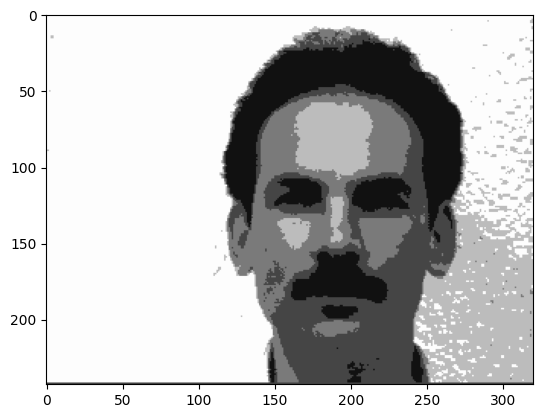

In [12]:

from cv2 import kmeans, TERM_CRITERIA_MAX_ITER, TERM_CRITERIA_EPS, KMEANS_RANDOM_CENTERS, imread, cvtColor, COLOR_BGR2RGB
from numpy import float32, uint8, unique
from matplotlib.pyplot import show, imshow
img_RGB = cvtColor(image, COLOR_BGR2RGB)

# Reshape image to an Mx3 array
img_data = img_RGB.reshape(-1, 3)

# Find the number of unique RGB values
print(len(unique(img_data, axis=0)), 'unique RGB values out of', img_data.shape[0], 'pixels')

# Specify the algorithm's termination criteria
criteria = (TERM_CRITERIA_MAX_ITER + TERM_CRITERIA_EPS, 10, 1.0)

# Run the k-means clustering algorithm on the pixel values
compactness, labels, centers = kmeans(data=img_data.astype(float32), K=5, bestLabels=None, criteria=criteria, attempts=10, flags=KMEANS_RANDOM_CENTERS)

# Apply the RGB values of the cluster centers to all pixel labels
colours = centers[labels].reshape(-1, 3)

# Find the number of unique RGB values
print(len(unique(colours, axis=0)), 'unique RGB values out of', img_data.shape[0], 'pixels')

# Reshape array to the original image shape
img_colours = colours.reshape(img_RGB.shape)

# Display the quantized image
imshow(img_colours.astype(uint8))
show()

In [ ]:
def image_feature(direc):
    model = InceptionV3(weights='imagenet', include_top=False)
    features = [];
    img_name = [];
    for i in tqdm(direc):
        fname='cluster'+'/'+i
        img=image.load_img(fname,target_size=(224,224))
        x = img_to_array(img)
        x=np.expand_dims(x,axis=0)
        x=preprocess_input(x)
        feat=model.predict(x)
        feat=feat.flatten()
        features.append(feat)
        img_name.append(i)
    return features,img_name

In [ ]:
img_features,img_name=image_feature(image)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle

# Load sample images (you can replace this with your own dataset loading code)
china = load_sample_image("/content/drive/MyDrive/dataset/subject02_7.jpg")
data = china / 255.0  # Rescale pixel values to [0, 1]
data = data.reshape((-1, 3))  # Reshape image data into feature vectors

# Shuffle the data
data = shuffle(data, random_state=0)

# Define the number of clusters (K)
k = 5

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(data)
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

# Plot the original image and the image segmented by K-means
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(china)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Image Segmented by K-means")
segmented_img = cluster_centers[cluster_labels].reshape(china.shape)
plt.imshow(segmented_img)
plt.axis('off')

plt.show()


In [ ]:
        # Attempt to load the image file
        image = mpl.image.imread(file_path)
        file_names = os.listdir(dataset_dir)

# Pass the list of file names to the image_feature function
        img_features, img_names = image_feature(dataset_dir)